In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

import numpy as np 
from layers import Linear
from sequential import Sequential
from activations import LogSoftMax, ReLU
from criterions import ClassNLLCriterion
from optimizers import sgd_momentum
from trainer import Trainer
from metrics import Accuracy

# Toy Example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

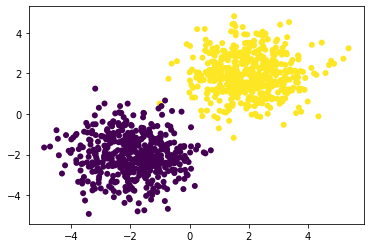

In [3]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

In [4]:
net = Sequential(name='MySequential')
net.add(Linear(2, 4, name='Linear'))
net.add(ReLU())
net.add(Linear(4, 8, name='Linear'))
net.add(ReLU())
net.add(Linear(8, 16))
net.add(ReLU())
net.add(Linear(16, 16))
net.add(ReLU())
net.add(Linear(16, 8))
net.add(ReLU())
net.add(Linear(8, 4))
net.add(ReLU())
net.add(Linear(4, 2))
net.add(LogSoftMax())

criterion = ClassNLLCriterion()

print(net)

# Test something like that then 

# net = Sequential()
# net.add(Linear(2, 4))
# net.add(ReLU())
# net.add(Linear(4, 2))
# net.add(LogSoftMax())

Linear	|	Input shape: (batch_size, 2)	|	Output shape: (batch_size, 4)	|	#Params: 12

ReLU
Linear	|	Input shape: (batch_size, 4)	|	Output shape: (batch_size, 8)	|	#Params: 40

ReLU
Linear	|	Input shape: (batch_size, 8)	|	Output shape: (batch_size, 16)	|	#Params: 144

ReLU
Linear	|	Input shape: (batch_size, 16)	|	Output shape: (batch_size, 16)	|	#Params: 272

ReLU
Linear	|	Input shape: (batch_size, 16)	|	Output shape: (batch_size, 8)	|	#Params: 136

ReLU
Linear	|	Input shape: (batch_size, 8)	|	Output shape: (batch_size, 4)	|	#Params: 36

ReLU
Linear	|	Input shape: (batch_size, 4)	|	Output shape: (batch_size, 2)	|	#Params: 10

LogSoftMax



In [5]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 100
batch_size = 64

In [6]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

In [10]:
net = Sequential(name='MySequential')
net.add(Linear(2, 4, name='Linear'))
net.add(ReLU())
net.add(Linear(4, 8, name='Linear'))
net.add(ReLU())
net.add(Linear(8, 16))
net.add(ReLU())
net.add(Linear(16, 16))
net.add(ReLU())
net.add(Linear(16, 8))
net.add(ReLU())
net.add(Linear(8, 4))
net.add(ReLU())
net.add(Linear(4, 2))
net.add(LogSoftMax())


metrics = {
    Accuracy(): 'acc'
}

trainer = Trainer(
    model=net,
    dataloader=get_batches((X, Y), 20),
    criterion=criterion,
    metrics_fn=metrics,
    optimizer=sgd_momentum,
    optimizer_config=optimizer_config,
    optimizer_state=optimizer_state
)
trainer.fit(n_epochs=20)


Epoch 0/20: 100%|██████████| 20/20 [00:09<00:00,  1.96it/s, avg_loss: 0.693821503109192, loss_step: 0.6882621349785284, acc: 0.0, ]
Epoch 0/20: 21it [00:10,  1.96it/s, avg_loss: 0.693821503109192, loss_step: 0.6882621349785284, acc: 0.0, ]                        
Epoch 0/20: 21it [00:10,  1.96it/s, avg_loss: 0.693085829646978, loss_step: 0.6783723604026973, acc: 0.0, ]
Epoch 0/20: 22it [00:10,  1.96it/s, avg_loss: 0.693085829646978, loss_step: 0.6783723604026973, acc: 0.0, ]
Epoch 0/20: 22it [00:10,  1.96it/s, avg_loss: 0.6928655744847518, loss_step: 0.6882402160780039, acc: 0.0, ]
Epoch 0/20: 23it [00:11,  1.96it/s, avg_loss: 0.6928655744847518, loss_step: 0.6882402160780039, acc: 0.0, ]
Epoch 0/20: 23it [00:11,  1.96it/s, avg_loss: 0.6938015142664573, loss_step: 0.7143921894639779, acc: 0.0, ]
Epoch 0/20: 24it [00:11,  1.96it/s, avg_loss: 0.6938015142664573, loss_step: 0.7143921894639779, acc: 0.0, ]
Epoch 0/20: 24it [00:11,  1.96it/s, avg_loss: 0.6946754426626872, loss_step: 0.7147

(Linear	|	Input shape: (batch_size, 2)	|	Output shape: (batch_size, 4)	|	#Params: 12
 
 ReLU
 Linear	|	Input shape: (batch_size, 4)	|	Output shape: (batch_size, 8)	|	#Params: 40
 
 ReLU
 Linear	|	Input shape: (batch_size, 8)	|	Output shape: (batch_size, 16)	|	#Params: 144
 
 ReLU
 Linear	|	Input shape: (batch_size, 16)	|	Output shape: (batch_size, 16)	|	#Params: 272
 
 ReLU
 Linear	|	Input shape: (batch_size, 16)	|	Output shape: (batch_size, 8)	|	#Params: 136
 
 ReLU
 Linear	|	Input shape: (batch_size, 8)	|	Output shape: (batch_size, 4)	|	#Params: 36
 
 ReLU
 Linear	|	Input shape: (batch_size, 4)	|	Output shape: (batch_size, 2)	|	#Params: 10
 
 LogSoftMax,
 {'loss': [0.6653620927871534,
   0.6756724327664166,
   0.7181323663115612,
   0.7482888386723601,
   0.7012676314581199,
   0.6674908653332963,
   0.6790601628366758,
   0.6882739341007256,
   0.7128090083242862,
   0.7015705182546108,
   0.6820381107077289,
   0.6998000785021418,
   0.6943572002830332,
   0.6908908793385797,
   0.

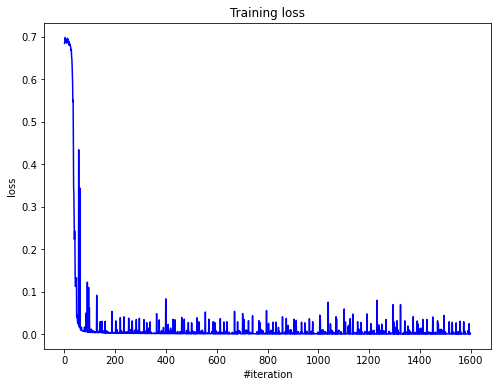

Current loss: 0.000364


In [8]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

In [16]:
a = np.array([1, 2, 6, 5, 7])
np.eye(8)[a]


array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])